<a href="https://colab.research.google.com/github/lucasgrezzi/IA_for_DataVisualization/blob/main/Usando_IA_para_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Utilizando a IA na construção de visualizações de dados**


O  objetivo é otimizar, a partir do uso da IA generativa do ChatGPT, o processo de análise exploratória dos dados (AED) e criação dos visuais utilizando a linguagem Python. Todo esse processo, leva em conta o prazo curto para as análises e a qualidade da entrega.

Irei trabalhar com o storytelling da empresa fictícia Zoop, uma grande varejista que atende a todas as regiões do Brasil por meio do seu e-commerce. Ela é conhecida pela ampla variedade em seus produtos buscando atender a todo tipo de público.

Para gerenciar o seu alcance, bem como o faturamento de seu setor em lojas online, ela consolida os dados em diferentes períodos de tempo e avalia esses dados para gerar insights e tomar algumas decisões estratégicas em seu negócio. Neste projeto, vamos ter acesso aos dados de parte da sua clientela do e-commerce dentro do ano de 2023.

# **Problema de negócio:**
O time de dados da Zoop precisa extrair os dados e gerar informações por meio de visuais que possam ser apresentados a diretoria da empresa apontando os dados de faturamento, perfil do cliente e outros indicadores que possam auxiliar na tomada de decisão em sua loja online.

# **Base de dados**
Vamos importar duas bases de dados:

*  Dados de clientes do e-commerce da Zoop, separados pelo código identificador da
compra.

*  Dados de vendas do e-commerce da Zoop em 2023, separados pelo código identificador da compra.

Esses dados serão lidos a partir do repositório compartilhado pelo GitHub.

# **Solução prevista**

Tenho o desafio de extrair os dados de ambas as bases e construir visuais que possam agregar valor a apresentação dos resultados da Zoop em 2023. Para isso, serão repassados ao todo 7 questionamentos que foram separados para que você possa contribuir na construção do storytelling das vendas da empresa.

Para agilizar o processo da análise exploratória dos dados (AED) e a criação dos visuais, utilizaremos **a IA do ChatGPT como nossa assistente**, tudo isso levando em conta o prazo curto para as análises e a qualidade da entrega.

# **Visualização dos Dados**

In [4]:
url_clientes = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_clientes.csv"

url_vendas = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_vendas.csv"

In [6]:
clientes = pd.read_csv(url_clientes)
clientes.head()

,ID_compra,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
0,904,8972,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9
1,4613,5120,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9
2,5579,1847,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8
3,2405,2846,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7
4,2485,2715,Salvador,Bahia,Nordeste,30,Feminino,Não,10


In [7]:
vendas = pd.read_csv(url_vendas)
vendas.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX


# **Entendendo os dados**
* **Base de Clientes**



**Prompt**

Vamos atuar como analista de dados de um e-commerce. Recebemos duas bases de dados com os dados dos clientes e das vendas em 2023, respectivamente.

Neste primeiro momento, vamos explorar a base clientes no formato de um DataFrame, chamado "clientes". Ela contém dados dos clientes que realizaram comprar na loja virtual, sendo eles: ID da compra, ID do cliente, a cidade, estado e região da compra, idade, sexo biológico, se participam do programa de cashback e avaliação da compra.

Queremos fazer uma breve exploração dos dados para compreender um pouco sobre eles. Lembrando que os dados desta base já estão limpos e tratados. Construa um código para executar esta etapa usando o Python.

Não é necessário utilizar "print()" para mostrar o resultado das consultas.

In [10]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_compra         6169 non-null   int64 
 1   ID_cliente        6169 non-null   int64 
 2   cidade            6169 non-null   object
 3   uf                6169 non-null   object
 4   regiao            6169 non-null   object
 5   idade             6169 non-null   int64 
 6   sexo_biologico    6169 non-null   object
 7   cashback          6169 non-null   object
 8   avaliacao_compra  6169 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 433.9+ KB


In [11]:
clientes.describe()

,ID_compra,ID_cliente,idade,avaliacao_compra
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,5461.475280,38.260010,8.443670
std,1780.981237,2610.959977,9.838951,1.730584
min,1.000000,1005.000000,18.000000,0.000000
25%,1543.000000,3148.000000,31.000000,8.000000
50%,3085.000000,5436.000000,38.000000,9.000000
75%,4627.000000,7748.000000,45.000000,9.000000
max,6169.000000,9999.000000,70.000000,10.000000


In [15]:
clientes['sexo_biologico'].value_counts()

,count
sexo_biologico,
Feminino,3371
Masculino,2798


In [16]:
clientes['idade'].mean()

np.float64(38.2600097260496)

In [19]:
clientes['avaliacao_compra'].mean()

np.float64(8.44366996271681)

In [20]:
clientes['regiao'].value_counts()

,count
regiao,
Sudeste,2666
Nordeste,1882
Sul,819
Centro-Oeste,495
Norte,307


In [21]:
clientes['cashback'].value_counts()

,count
cashback,
Não,3557
Sim,2612


# **Entendendo os dados**
* **Base de Vendas**




# **Prompt**

Agora vamos explorar a base de vendas no formato de um DataFrame, chamado "vendas". Ela contém dados das vendas do e-commerce, sendo eles: ID da compra, data da compra, horário da compra, categoria do produto, preco unitário do produto, quantidade vendida, frete e o método do pagamento.

Queremos fazer uma breve exploração dos dados para compreender um pouco sobre eles. Lembrando que os dados desta base também já estão limpos e tratados. Construa um código para executar esta etapa usando o Python.


In [23]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_compra         6169 non-null   int64  
 1   data              6169 non-null   object 
 2   horario           6169 non-null   object 
 3   categoria         6169 non-null   object 
 4   preco_unitario    6169 non-null   float64
 5   quantidade        6169 non-null   int64  
 6   frete             6169 non-null   float64
 7   metodo_pagamento  6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [27]:
vendas["data"] = pd.to_datetime(vendas["data"], format="%Y-%m-%d")
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_compra         6169 non-null   int64         
 1   data              6169 non-null   datetime64[ns]
 2   horario           6169 non-null   object        
 3   categoria         6169 non-null   object        
 4   preco_unitario    6169 non-null   float64       
 5   quantidade        6169 non-null   int64         
 6   frete             6169 non-null   float64       
 7   metodo_pagamento  6169 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 385.7+ KB


In [25]:
vendas.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX


In [26]:
vendas.describe()

,ID_compra,data,preco_unitario,quantidade,frete
count,6169.000000,6169,6169.000000,6169.000000,6169.000000
mean,3085.000000,2023-08-20 00:12:22.292105984,873.234738,3.004863,119.233832
min,1.000000,2023-01-03 00:00:00,2.900000,1.000000,0.000000
25%,1543.000000,2023-05-30 00:00:00,44.900000,2.000000,0.320000
50%,3085.000000,2023-08-31 00:00:00,93.900000,3.000000,7.550000
75%,4627.000000,2023-11-23 00:00:00,221.900000,4.000000,29.240000
max,6169.000000,2023-12-31 00:00:00,8000.000000,5.000000,4521.540000
std,1780.981237,NaN,1852.064342,1.420725,366.149225


In [29]:
vendas['categoria'].value_counts()

,count
categoria,
Alimentos e bebidas,1495
Beleza e cuidados pessoais,1062
Casa e limpeza,1041
Eletrodomésticos,665
Eletrônicos,580
Papelaria e escritório,551
Ferramentas e construção,474
Livros,301


In [30]:
vendas['preco_unitario'].mean()

np.float64(873.2347382071648)

In [31]:
vendas['quantidade'].sum()

np.int64(18537)

In [32]:
vendas['frete'].sum()

np.float64(735553.51)

In [33]:
vendas['metodo_pagamento'].value_counts()

,count
metodo_pagamento,
Cartão de Crédito,2851
PIX,2244
Cartão de Débito,547
Boleto,527


# **Criação dos visuais**

Unir as tabelas utilizando o ChatGPT

# **Prompt**

Vamos agora unir as duas bases do nosso projeto em uma só utilizando como chave a coluna "ID_compra". Além disso, vamos organizar as colunas na seguinte sequência:

- ID_compra
- data
- horario
- categoria
- preco_unitario
- quantidade
- frete
- metodo_pagamento
- ID_cliente
- idade
- sexo_biologico
- cidade
- uf
- regiao
- cashback
- avaliacao_compra

Construa um código para executar esta etapa usando o Python e a biblioteca Pandas.


In [37]:
import pandas as pd

# Supondo que voc tenha os DataFrames "clientes" e "vendas" carregados

# Unindo as bases de dados com base na coluna "ID compra"
df = pd.merge(vendas, clientes, on='ID_compra')

# Organizando as colunas na sequência desejada
colunas_organizadas = [
    'ID_compra', 'data', 'horario', 'categoria','preco_unitario',
    'quantidade', 'frete', 'metodo_pagamento', 'ID_cliente', 'idade',
    'sexo_biologico', 'cidade', 'uf', 'regiao', 'cashback', 'avaliacao_compra'
]

df = df[colunas_organizadas]
df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,50,Masculino,São Paulo,São Paulo,Sudeste,Não,9


# **Visualização dos visuais**
**Prompt**

Agora com o nosso "df" já construído por meio das duas bases do projeto, vamos iniciar um novo processo. Queremos iniciar a etapa da geração dos visuais que possam auxiliar na análise do faturamento ao longo do ano, perfil do cliente e outros dados que possam ser relevantes à análise e construção do nosso storytelling.

As colunas de "df" são:

- ID_compra: número único atribuído a compra realizada, no formato int
- data: data da compra, no formato datetime
- horario: horário da compra no formato object
- categoria: categoria do produto, no formato object
- preco_unitario: preço de uma unidade do produto, no formato float
- quantidade: quantidade vendida do produto, no formato int
- frete: frete a ser pago no total da compra, no formato float
- metodo_pagamento: método de pagamento da compra, no formato object
- ID_cliente: número único atribuído ao cliente, no formato int
- idade: idade do cliente, no formato int
- sexo_biologico: sexo biológico do cliente, no formato object
- cidade: cidade do cliente, no formato object
- uf: unidade federativa do cliente, no formato object
- regiao: região do cliente, no formato object
- cashback: se o cliente participa ou não do programa de cashback da loja, no formato object
- avaliacao_compra: avaliação do cliente pela compra, no formato int

O objetivo é abstrair e buscar relações para construir visuais interessantes para a análise dos dados dos clientes e vendas da Zoop.

Com base nas informações fornecidas, quais tipos de visualizações seriam úteis para atingir o objetivo de analisar os dados?


# Questionamentos

***Vendas***

Quais foram os métodos de pagamentos mais utilizados em 2023?

Qual foi o faturamento por categoria em 2023?

Como foram as vendas ao longo dos meses em 2023?

Como esta dividida a venda por trimestre por método de pagamento? Existe um período em que algum tipo de pagamento se sobressai?

***Perfil do cliente***

Qual a proporção da clientela que participa de nosso programa de cashback?

Como estão distribuidas as avaliações de produto? Temos bons números gerais?

Como está distribuído o nosso público por idade e sexo biológico? Existe um grupo que sobressai?

Inicialmente, vamos fazer a primeira versão dos gráficos, ainda não refinados com os elementos visuais, para mais a frente ir adicionando as diversas técnicas de storytelling.

# **Prompt**

Temos um DataFrame chamado "df" e queremos construir um visual que apresente quais métodos de pagamentos foram os mais utilizados.

Em "df", temos a coluna "metodo_pagamento" com os 4 tipos de pagamento utilizado na compra.

Inicialmente, queremos construir uma tabela chamada "metodos_de_pagamento" que resuma os dados dessa coluna e, na sequência, desejamos criar uma visualização que apresente a quantidade desses métodos de pagamento presentes na tabela "metodo_pagamento".

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

In [39]:
import matplotlib.pyplot as plt

# Supondo que você tenha o DataFrame "df" carregado
# Criar a tabela "metodos_de_pagamento"
metodos_de_pagamento = df['metodo_pagamento'].value_counts().reset_index()
metodos_de_pagamento.columns = ['Metodo de Pagamento', 'Quantidade']

metodos_de_pagamento

,Metodo de Pagamento,Quantidade
0,Cartão de Crédito,2851
1,PIX,2244
2,Cartão de Débito,547
3,Boleto,527


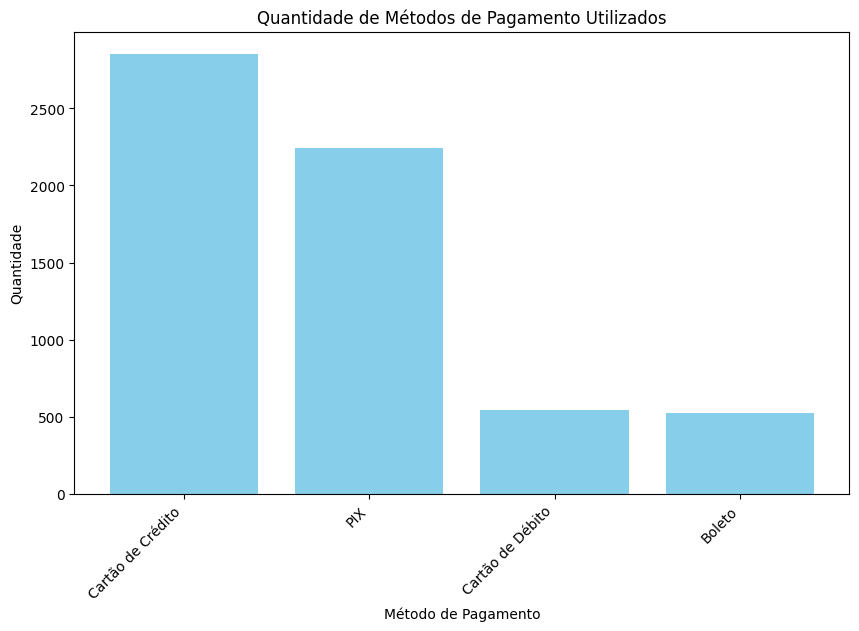

In [40]:
# Visualização
plt.figure(figsize=(10, 6))
plt.bar(metodos_de_pagamento['Metodo de Pagamento'], metodos_de_pagamento['Quantidade'], color='skyblue')
plt.title('Quantidade de Métodos de Pagamento Utilizados')
plt.xlabel('Método de Pagamento')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.show()

# **Questionamento 2**
Construindo o prompt
Focaremos em responder o seguinte questionamento em meio às perguntas de vendas: "Qual foi o faturamento por categoria em 2023?".

Aqui, entendemos por faturamento o produto entre o preço unitário de um produto e a quantidade que aquele produto é vendido, somado ao valor do frete. Precisamos converter essa lógica em código para calcular o faturamento. Para isso, vamos incorporar essas instruções no nosso prompt para que o Chat GPT nos ajude a construir esse código:

# **Prompt**

Temos um DataFrame chamado "df" e queremos construir um visual de gráfico de barras horizontais que apresente o faturamento por categoria da Zoop.

Em "df", temos as colunas:

categoria: categorias dos produtos

preco_unitario: preço de uma unidade do produto

quantidade: quantidade vendida do produto

frete: frete a ser pago no total da compra.

Desejamos criar uma visualização que apresente o faturamento de cada categoria, em que o faturamento é dado pelo produto entre o preço unitário e a quantidade somadas ao frete.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

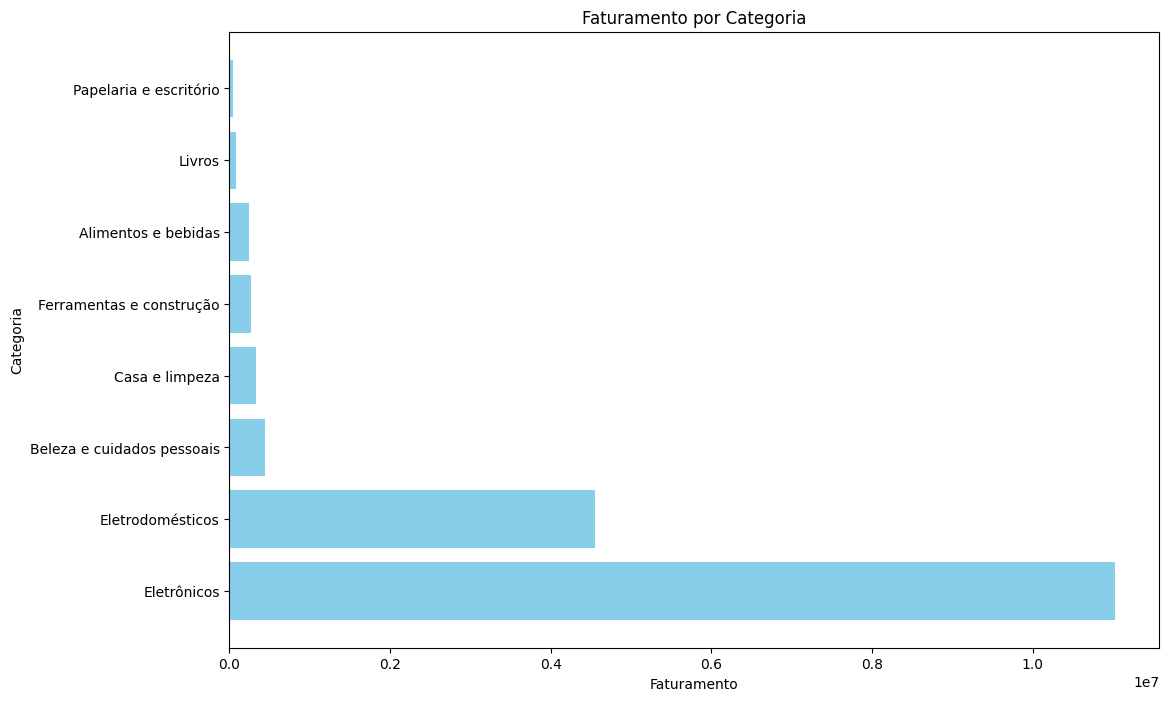

In [41]:

# Calcular o faturamento para cada categoria
df['faturamento'] = (df['preco_unitario'] * df['quantidade']) + df['frete']

# Agrupar por categoria e calcular o faturamento total
faturamento_por_categoria = df.groupby('categoria')['faturamento'].sum().reset_index()

# Ordenar por faturamento
faturamento_por_categoria = faturamento_por_categoria.sort_values(by='faturamento', ascending=False)

# Visualização
plt.figure(figsize=(12, 8))
plt.barh(faturamento_por_categoria['categoria'], faturamento_por_categoria['faturamento'], color='skyblue')
plt.title('Faturamento por Categoria')
plt.xlabel('Faturamento')
plt.ylabel('Categoria')

# Exibir o gráfico
plt.show()

# **Questionamento 3**
Agora, vamos ao terceiro questionamento em meio às perguntas de vendas: "Como foram as vendas ao longo dos meses em 2023?".

# **Prompt**

Temos um DataFrame chamado "df" e queremos construir um visual de gráfico de linha que apresente as vendas totais mensais da Zoop.

Em "df", temos as colunas:

data: com as datas das compras no formato datetime (aaaa-mm-dd)
faturamento: dado pelo produto entre o preço unitário e a quantidade somadas ao frete de cada venda.
Desejamos criar uma visualização que apresente as vendas por mês. Prmeiro, agrupe os dados por mês e depois crie uma nova coluna chamada "mes" que receba o nome de cada mês, traduzindo os meses do índice por meio do dicionário abaixo. Utilize a coluna "data" para o agrupamento dos dados e construção do gráfico. A coluna "mes" só deve ser utilizada para alterar os rótulos do eixo x.

meses = { 'January': 'Jan', 'February': 'Fev', 'March': 'Mar', 'April': 'Abr', 'May': 'Mai', 'June': 'Jun', 'July': 'Jul', 'August': 'Ago', 'September': 'Set', 'October': 'Out', 'November': 'Nov', 'December': 'Dez' }

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

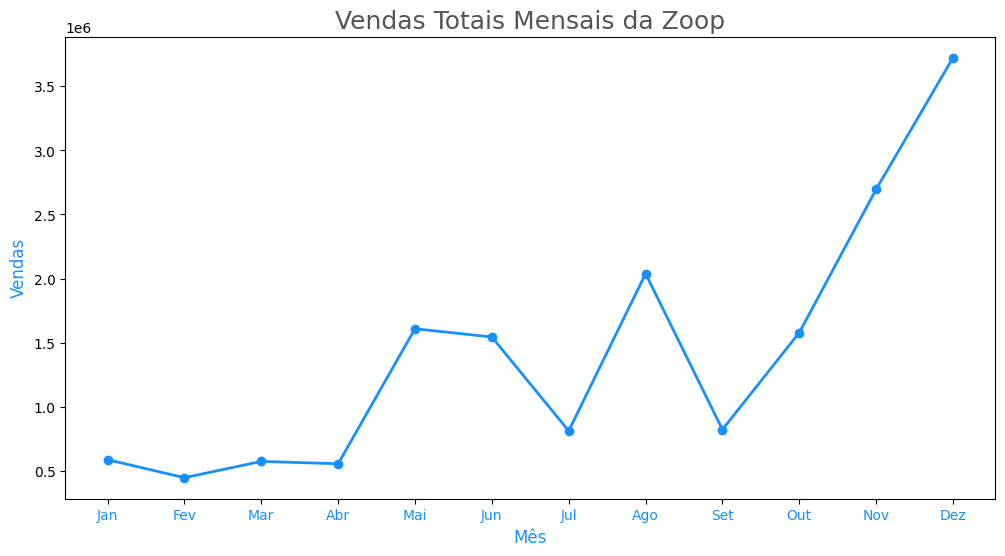

In [42]:
meses = {
    'January': 'Jan',
    'February': 'Fev',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'Mai',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Set',
    'October': 'Out',
    'November': 'Nov',
    'December': 'Dez'
}

# Agrupar por mês e calcular as vendas totais
df['mes'] = df['data'].dt.strftime('%B')
vendas_mensais = df.groupby('mes')['faturamento'].sum().reindex(meses.keys())

# Configurações do gráfico
plt.figure(figsize=(12, 6))
plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color='#1890FF', linewidth=2)

# Adicionar rótulos e título
plt.title('Vendas Totais Mensais da Zoop', fontsize=18, color='#555555')
plt.xlabel('Mês', fontsize=12, color='#1890FF')
plt.ylabel('Vendas', fontsize=12, color='#1890FF')

# Alterar rótulos do eixo x utilizando o dicionário de tradução
plt.xticks(vendas_mensais.index, [meses[mes] for mes in vendas_mensais.index], fontsize=10, color='#1890FF')

# Exibir o gráfico
plt.show()


# **Compondo dados dinâmicos**
# **Prompt**

Temos um DataFrame chamado "df" e queremos construir um visual de gráfico de barras empilhadas que apresente as vendas por trimestre em relação ao método de pagamento da Zoop.

Em "df", temos as colunas:

data: com as datas das compras no formato datetime (aaaa-mm-dd)

faturamento: com os valores das vendas

metodo_pagamento: com o método de pagamento escolhido na compra

Desejamos criar uma visualização que apresente as vendas por trimestre, agrupando os métodos de pagamento de cada trimestre correspondente a cada compra.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

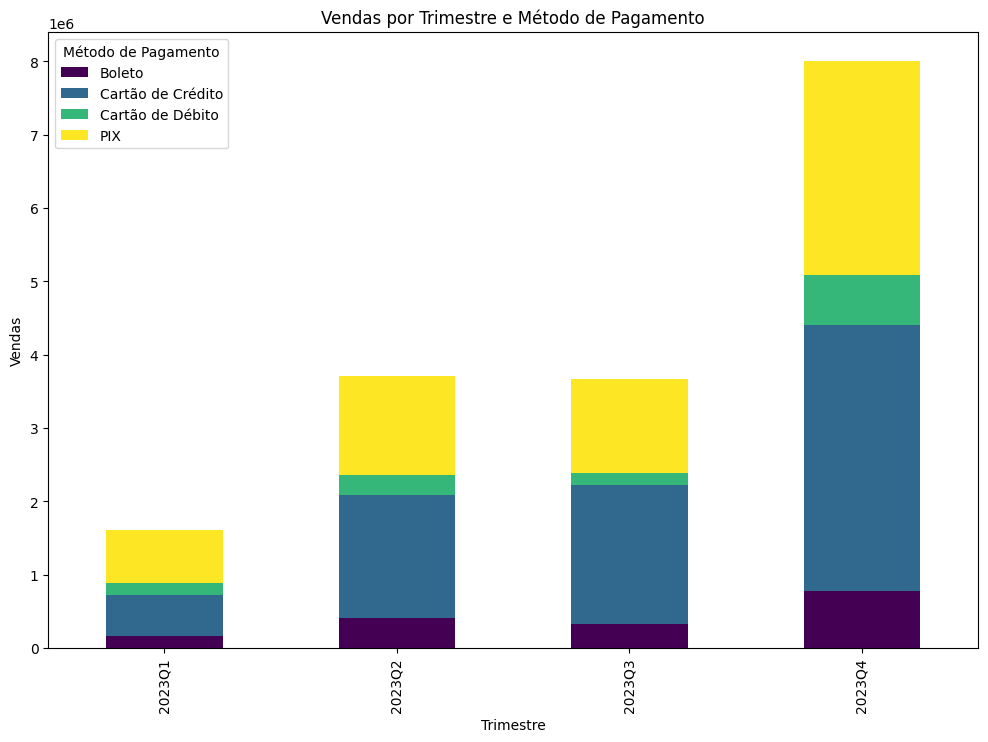

In [43]:
# Criar uma nova coluna para identificar o trimestre
df['trimestre'] = df['data'].dt.to_period('Q')

# Agrupar por trimestre e método de pagamento, somando o faturamento
vendas_por_trimestre = df.groupby(['trimestre', 'metodo_pagamento'])['faturamento'].sum().unstack()

# Visualização em gráfico de barras empilhadas
vendas_por_trimestre.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Vendas por Trimestre e Método de Pagamento')
plt.xlabel('Trimestre')
plt.ylabel('Vendas')
plt.legend(title='Método de Pagamento')

plt.show()

Esse projeto teve como objetivo utilizar o ChatGPT como assistente pessoal na análise e geração de visualização de dados aliado a Linguagem Python visando o desenvolvimento de um storytelling sobre as vendas e perfil dos clientes de uma empresa fictícia.

Explorando os processos de extração, tratamento e visualização de dados, criação de scripts em Python personalizados de acordo com os prompts executados no ChatGPT e reconhecimento das limitações e possibilidades do uso de IAs na otimização de processos de análise e visualização de dados.

Além disso, foi criado gráficos dos mais diversos tipos partindo do uso das bibliotecas mais utilizadas em Python, personalizando-os e adicionando recursos visuais como anotações, destaques, legenda de dados e outras técnicas de visualização.